In [1]:
# import pacckages 
# read the data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\HP\Documents\nareshIT\EDA\Data file\Visadataset.csv"

In [4]:
Visa_df=pd.read_csv(path)
Visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
cat_columns=Visa_df.select_dtypes(include='object').columns
num_columns=Visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

 **Boxplot**

- Box plot as used to identify the outliers

- Outliers is an observation having huge positive value or huge negative value

- Q1=25p , Q2=50p and Q3=75p

- IQR=Inter Quartile range=Q3-Q1

- Q3+1.5*IQR and Q1-1.5*IQR

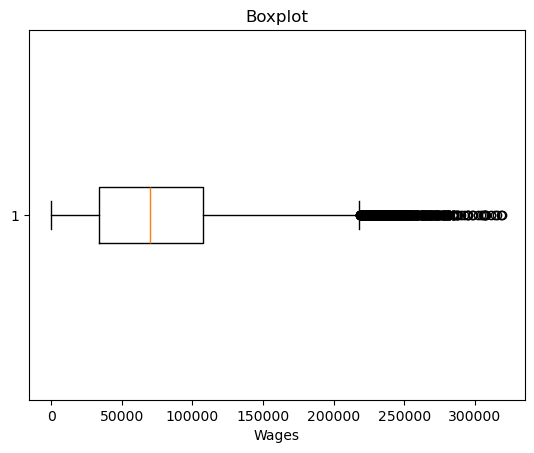

In [14]:
# Read the Preavailaing wage data and plot the box plot
wage_data=Visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

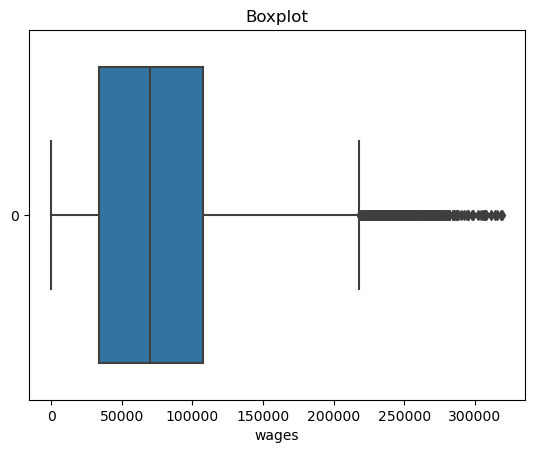

In [6]:
wage_data=Visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

**Plot the Histogram plot and box plot side by side**

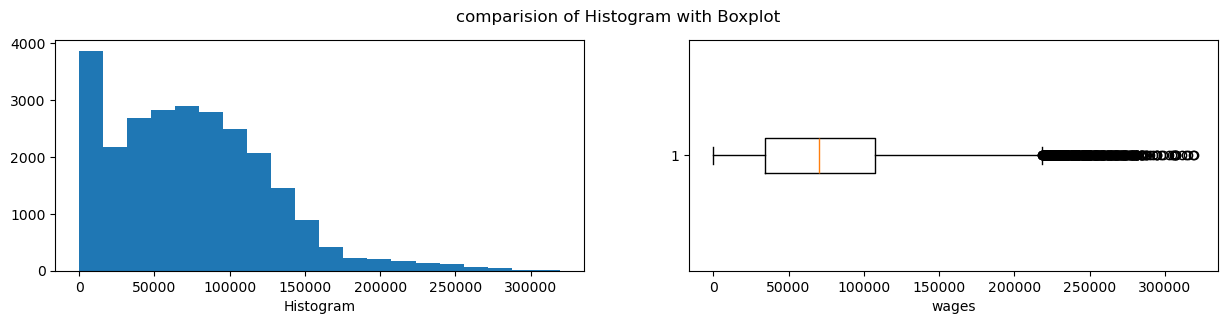

In [16]:

wage_data=Visa_df['prevailing_wage']
plt.figure(figsize=(15,3))
plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('wages')
plt.show()

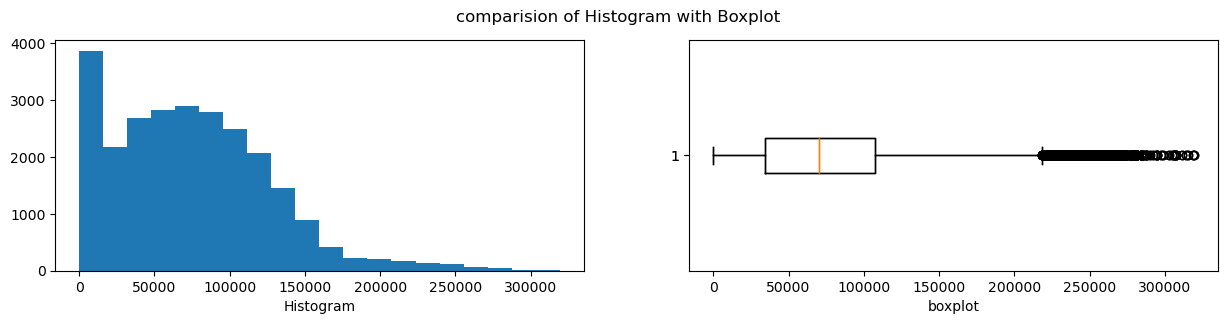

In [17]:
wage_data=Visa_df['prevailing_wage']
plt.figure(figsize=(15,3))
plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

**plot the histogram plot and Box plot side by side**

** Finding the outliers**

- we all ready know that outliers available less than Q1-1.5*IQR and Q3+1.5*

- step-1 

  - Calculate Q1=25p 

  - Calculate Q2=50p

  - Calculate Q3=75p

- step-2 
   - Calculate IQR=Q3-Q1

- step-3:
   - Calculate LB=Q1-1.5*IQR

   - Calculate UB=Q3+1.5*IQR

- Step-4

   - Con1 = wage data<LB

   - con2 = wage data<UB

   - con3 = con1 or - and con2(use bitwise operator)

- step-5 Data[con3]

In [18]:
# step-1
wage_data=Visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75) 
#step-2
IQR=q3-q1
#step-3
lb=q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4
con1=wage_data<lb   # T f
con2=wage_data>ub   # T f
con3=con1|con2
# Bitwise operators used to compare
# Bits data== 0 and 1 ===True false
#step-3:
outliers_data=wage_data[con3]
outliers_data



14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [10]:
outliers_df=Visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [19]:
# step-1
wage_data=Visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75) 
#step-2
IQR=q3-q1
#step-3
lb=q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4
con1=wage_data>lb   # T f
con2=wage_data<ub   # T f
con3=con1&con2
# bitwise operators used to compare
# bits data===0 and 1 ===True False
# step-3
#np.Logical_and(con1,con2)
non_outliers_df=Visa_df[con3]
non_outliers_df



,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframe

- Visa_df:Total data 25480

- non_outliers_df=After removing outliers 25053

- first plot nonoutliers data prewaling wage histogram and boxplot

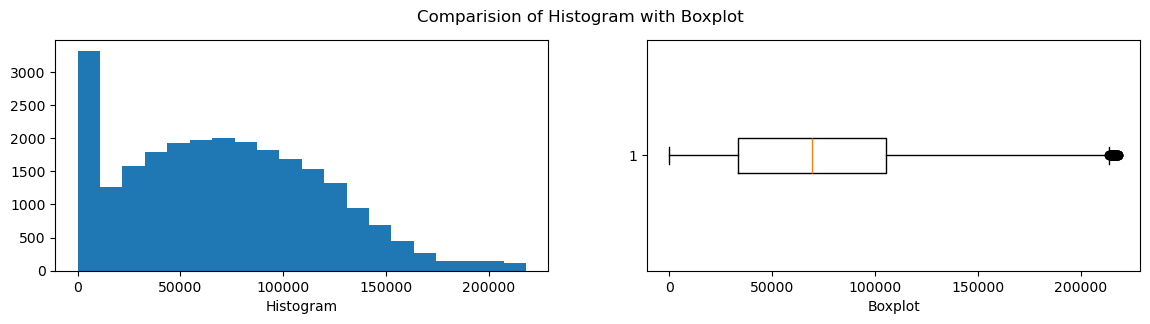

In [20]:
wage_data_non_outliers_df=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers_df,bins=20) # we can directly to 
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers_df,vert=False)
plt.xlabel('Boxplot')
plt.show()



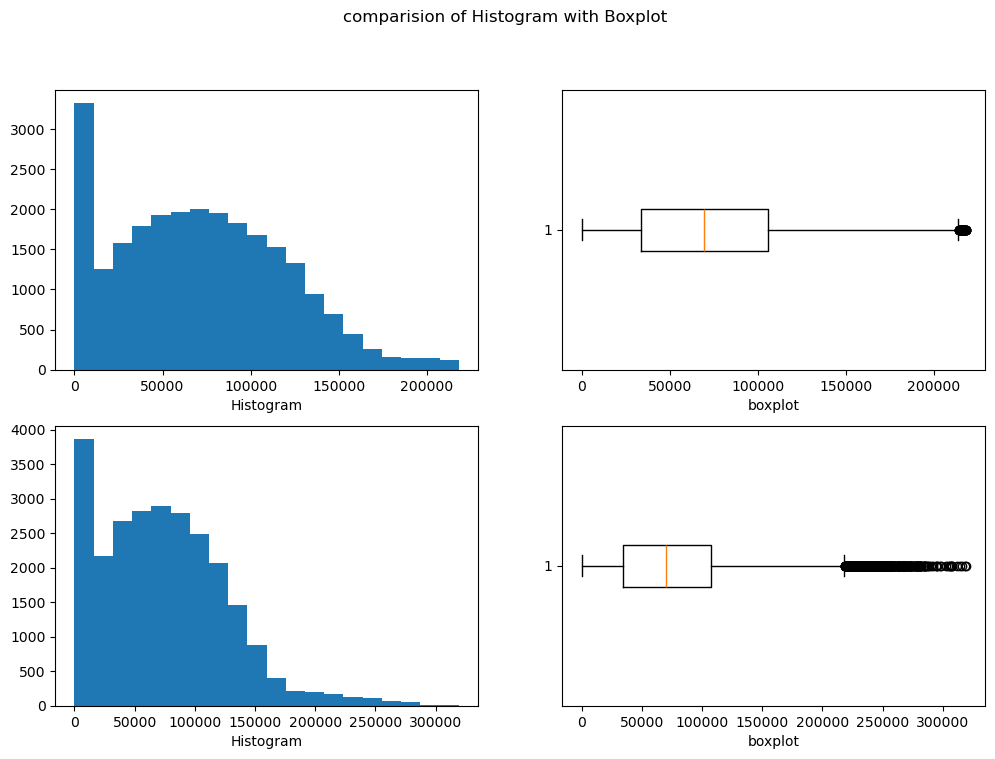

In [21]:
#######################################################################
wage_data_non_outliers_df=non_outliers_df['prevailing_wage']
wage_data=Visa_df['prevailing_wage']
#######################################################
plt.figure(figsize=(12,8))
plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers_df,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers_df,vert=False)
plt.xlabel('boxplot')
####################################################################
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

In [14]:
# fill the outliers of wage data with wage median
# 427 outliers
#427 should replace with meadin value
# again draw the plots

**or and**

- or behaviour:

   - suppose we take two indivisual condition

   -  if any one True, the final is become True 

- and behaviour 

   - suppose we take two indivisual conditions 

   - both conditions should be, the final is becomes true 


In [22]:
#import the packages
# Read the data
#categorical to Numerical
# find the outliers
# Import the packages
# Read the data

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
path=r"C:\Users\HP\Documents\nareshIT\EDA\Data file\Visadataset.csv"

In [24]:
Visa_df=pd.read_csv(path)
Visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [25]:
cat_columns=Visa_df.select_dtypes(include='object').columns
num_columns=Visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [26]:
wage_data=Visa_df['prevailing_wage']
#step-1


q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75) 
#step-2
IQR=q3-q1
#step-3
lb=q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4
con1=wage_data<lb   # T f
con2=wage_data>ub   # T f
con3=con1|con2
# bitwise operators used to compare
# bits data===0 and 1 ===True False
# step-3
#np.Logical_and(con1,con2)
outliers_data=wage_data[con3]
outliers_data



14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [27]:
# step-1
wage_data=Visa_df['prevailing_wage']
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75) 
#step-2
IQR=q3-q1
#step-3
lb=q1-1.5*IQR
ub=q3+1.5*IQR
#Step-4
con1=wage_data>lb   # T f
con2=wage_data<ub   # T f
con3=con1&con2
# bitwise operators used to compare
# bits data===0 and 1 ===True False
# step-3
#np.Logical_and(con1,con2)
non_outliers_df=Visa_df[con3]
non_outliers_df



,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


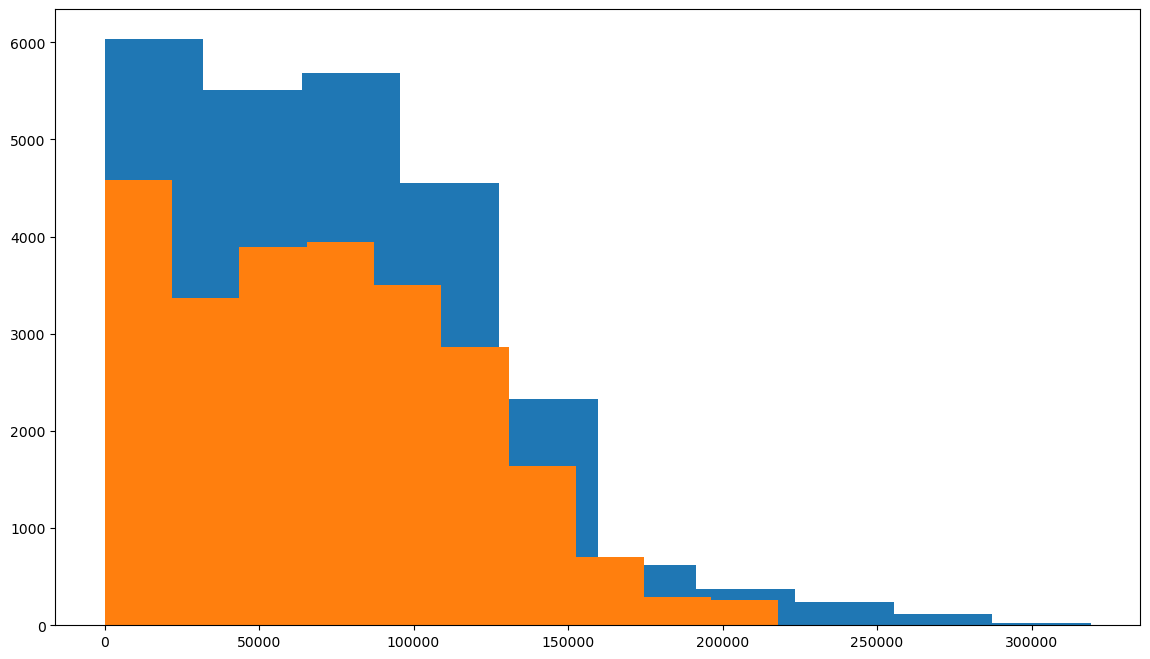

In [28]:
#######################################################################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=Visa_df['prevailing_wage']
#######################################################
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()


**How to deals outliers**

 - 1. we can drop the outliers

    - Droping outliers is an easy task, but not recomended

    - if you drop the outliers we are droping the rows

    - which means we are dropping the other columns values 

    - may be some important information we might loose from others columns values 

    - but in industry if outliers percentage less than 2% of the total data, we 

    - The number of outliers in pwage is 427

    - The number of total observation are 25480

    - the percentage is 1.67 which is less than 2 % 

- 2. Fill with median value

        - we already know that outliers does not affect by median

        - so it is the best practice to fill the outliers with median

- 3. Capping or Florring 

     - instead of fill with median 

     - we can fill with certain values 

     - the outliers which are less than LB fill with Lb values 

     - the outliers which are greater than UB fill with UB values 

 **Isolation Forest**

   - is Ml model used to find the outliers and anamolies

     

**Fill with median value**

- np.where

   - in numpy we have method called where
 
   - it takes three arguments
 
       - 1.condition
    
       - 2. value if condition is True
        
       - 3. Value if conditon is False
        
- it is applicable for only Binary if and else 

In [22]:
# list1=[]
# for value in wage_data:
# if value <LB or value >UB:
# median=wage_data.meadin()
#else:
#list1.append(value)

In [29]:
dict1={'sub':['DS','DE','CS'],
       'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [31]:
# Qn: I want to replace marks with 1, which are greter than 100 

dict1={'sub':['DS','DE','CS'],
       'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

l=[]
for i in df['marks']:
    if i >100:
        l.append(1)
    else:
        l.append(i)

df['marks']=1
df

,sub,marks
0,DS,1
1,DE,1
2,CS,1


In [32]:
dict1={'sub':['DS','DE','CS'],
       'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [34]:
# np.where(<condition>,<True>,<False>)

con=df['marks']>100
l=np.where(con, 1,df['marks'])
df['marks']=l
df

,sub,marks
0,DS,100
1,DE,1
2,CS,1


<!-- # List1=[]
# for value in wage_data:
#     if value<LB or value>UB:
#         medain=wage_data.median()
#         list1.append(median)

#     else:
#         list1.append(value)
 -->

In [35]:
# implement for the outliers
wage_data=Visa_df['prevailing_wage']
con1=wage_data<lb
con2=wage_data>ub
con=con1 | con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [36]:
Visa_df['prevailing_wage_update']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

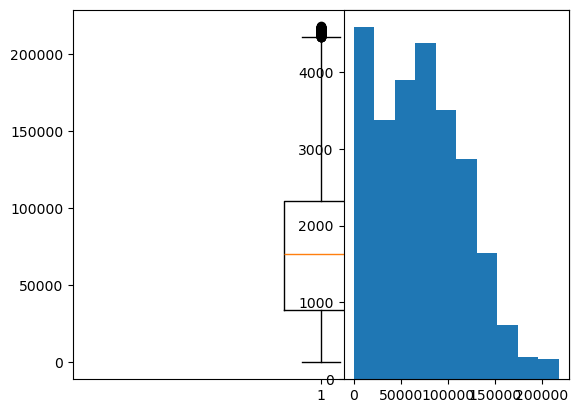

In [37]:
plt.subplot(1,1,1).boxplot(Visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(Visa_df['prevailing_wage_update'])

In [2]:
# import the packages, read the data and divide data into numericala and categorical
# import rhe packages
#read the data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path=r"C:\Users\HP\Documents\nareshIT\EDA\Data file\Visadataset.csv"

In [4]:
Visa_df=pd.read_csv(path)
Visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
cat_columns=Visa_df.select_dtypes(include='object').columns
num_columns=Visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

- we already see uni variate analysis

- we performed the categorical columns analysis 

    - Frequency table (value counts)

    - Bar chart 

    - Relative Frequency table(Value counts Normalized form)

    - Pie chart


- we performed the numerical columns analysis

    - Histogram

   - Distribution plots 

   - Box plot 

   - Outliers analysis 

   - Filling the outliers 


- Now we will do categorical - categorical Analaysis 

- Numerical -Numerical analysis 

- Categorical-Numerical analysis

**Categoriacal -categoriacal**
- lets c onsider Two categorical

   - continent 

   - Case status 

In [42]:
# continent
# Aug7th video second half 
# I will cleanen up

Visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [43]:
Visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**

- Find the certified observation continent wise 

- Find the denined observation continent wise 


In [10]:
# step-1: Make the first condition continent=='Asia'
# step-2: Make the second condition case_status=='certified'
# step-3: make the third condition: con1 & con2
# step-4: then retrive the dataframe and take the count 
con1=Visa_df['continent']=='Asia'
con2=Visa_df['case_status']=='Certified'
con3=con1&con2
len(Visa_df[con3])

11012

In [11]:
Visa_df['continent'].unique()
Visa_df['continent'].value_counts().keys()


Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [12]:
continents=Visa_df['continent'].unique()
certified_list=[]
for i in continents:
   con1=Visa_df['continent']==i
   con2=Visa_df['case_status']=='Certified'
   con3=con1&con2
   count=len(Visa_df[con3])
   print(f"the number of certified Visa From {i} is: {count}")
   certified_list.append(count)
    

the number of certified Visa From Asia is: 11012
the number of certified Visa From Africa is: 397
the number of certified Visa From North America is: 2037
the number of certified Visa From Europe is: 2957
the number of certified Visa From South America is: 493
the number of certified Visa From Oceania is: 122


In [15]:
continents=Visa_df['continent'].unique()
certified_list,denied_list=[],[]
for i in continents:
   con1=Visa_df['continent']==i
   con2=Visa_df['case_status']=='Certified'
   con3=Visa_df['case_status']=='Denied'
   cert_con=con1&con2
   den_con=con1&con3
   cert_count=len(Visa_df[cert_con])
   den_count=len(Visa_df[den_con])
   print(f"the number of certified Visa From {i} is: {cert_count}")
   print(f"the number of certified Visa From {i} is: {den_count}")
   certified_list.append(cert_count)
   denied_list.append(den_count)
    

the number of certified Visa From Asia is: 11012
the number of certified Visa From Asia is: 5849
the number of certified Visa From Africa is: 397
the number of certified Visa From Africa is: 154
the number of certified Visa From North America is: 2037
the number of certified Visa From North America is: 1255
the number of certified Visa From Europe is: 2957
the number of certified Visa From Europe is: 775
the number of certified Visa From South America is: 493
the number of certified Visa From South America is: 359
the number of certified Visa From Oceania is: 122
the number of certified Visa From Oceania is: 70


In [16]:
continents
certified_list
cols=['Continents','Certified']
df1=pd.DataFrame(zip(continents,certified_list),
                 columns=cols)
df1

,Continents,Certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [17]:

cols=['Continents','Denied']
df2=pd.DataFrame(zip(continents,denied_list),
                 columns=cols)
df2

,Continents,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [18]:
cols=['Continents','Denied']
df3=pd.DataFrame(zip(certified_list,denied_list),
                 index=continents,
                 columns=cols)
df3

,Continents,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

- the  above data frame we can make by using a method:**Cross tab**

- It is available in pandas

- it takes two argument

    - index

    - column

- in above data frame Data column is : continent

- in above data frame Data column is : case_status

In [19]:
idx_column=Visa_df['continent']
data_column=Visa_df['case_status']
df4=pd.crosstab(idx_column,data_column)
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

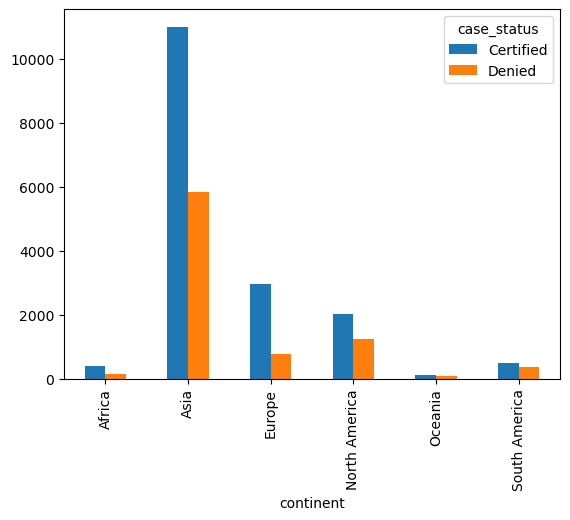

In [20]:
df4.plot(kind='bar')

<Axes: >

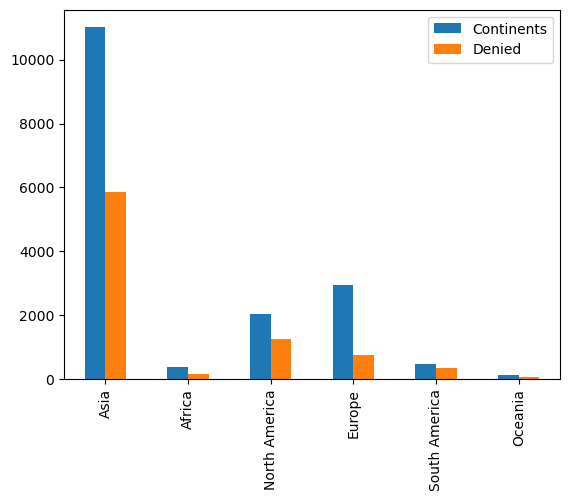

In [21]:
df3.plot(kind='bar')

**Multivariate analysis**

  - Education

  - case satus

  - we already know from Asia there l1k Accepted Visa

  - In that I want Furthur break down based on education

  - Here also pd.cross tab

  - First fix your index of any one column out of three column

  - then keep two column in a list and pass as data frame

In [22]:
idx_column=Visa_df['continent']
data_column=[Visa_df['education_of_employee'], 
             Visa_df['case_status']]

df5=pd.crosstab(idx_column,data_column)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

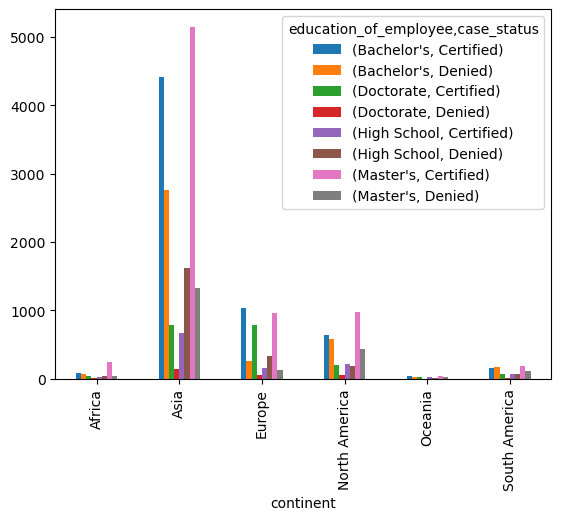

In [23]:
df5.plot(kind='bar')

In [6]:
# import pacckages 
# read the data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path=r"C:\Users\HP\Documents\nareshIT\EDA\Data file\Visadataset.csv"


In [8]:
Visa_df=pd.read_csv(path)
Visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [9]:
cat_columns=Visa_df.select_dtypes(include='object').columns
num_columns=Visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Numerical Vs Numerical**

- to understand numerical columns relation we need to plot scatter plots

- scatter plots give the relation between two numerical columns

- Bar chart- pie chart- historam-scater plots 

- scatters plot under matplotlib package

- plt.scatter

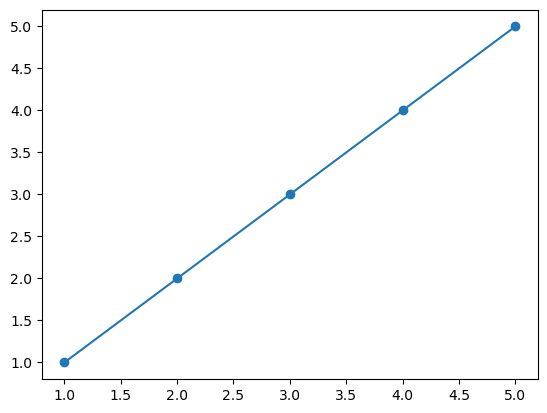

In [11]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

[]

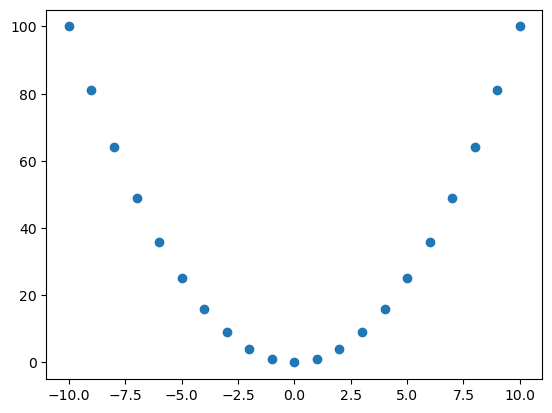

In [14]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot()

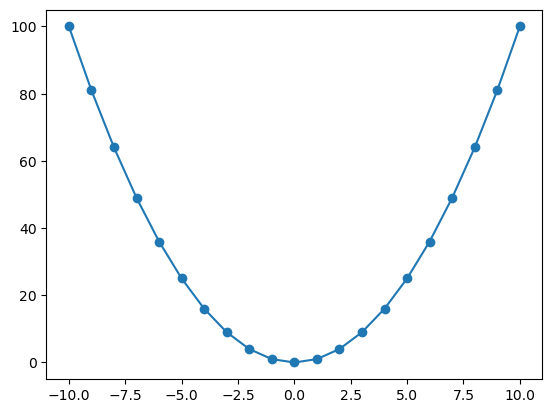

In [16]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)

In [15]:
pd.DataFrame(zip(x,y))

,0,1
0,-10,100
1,-9,81
2,-8,64
3,-7,49
4,-6,36
5,-5,25
6,-4,16
7,-3,9
8,-2,4
9,-1,1


In [ ]:
#step-1:read one numerical column
# step-2: read another numerical column
# apply the scatter plot
col1=Visa_df['no_of_employees']
col2=Visa_df['yr_of_estab']
col3=vailing_wage['pre

In [ ]:
# mean deviation
# variance
#covariance
# correlation coefficient 

- implement the covariance Function
- covariance vs correlation

   - covariance will tell about the columns have relation or not

   - covariance will explain about relation status

       - positive relation 

       - Negative relation 

       - No relation 

    - Correlation tells about How much relation Between Two variable 

       - It denoted with 'r'

       - r varies From -1 to 1 

       

**Method Name:  corr**

In [19]:
Visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heart map**

  - heat map is one of the important visulization method to show the matrix from of the value 

  - it is under **seaborn** packages 

  - in every matrix we have heightest values and lowest values availables


  - Heat map  give colors Visulization 

  - Also it provides color bar, which color indicates which values 

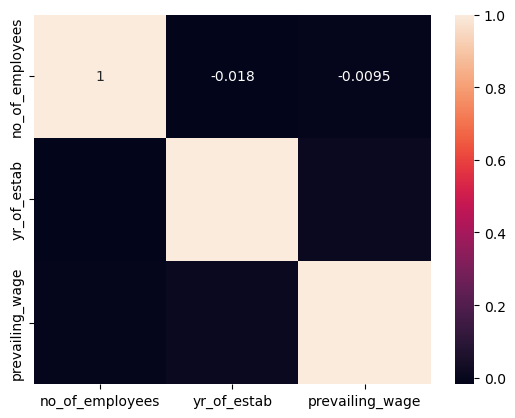

In [21]:
corr_data=Visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

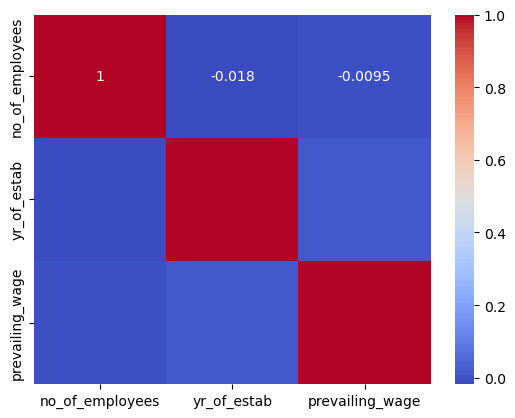

In [22]:
corr_data=Visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.show()

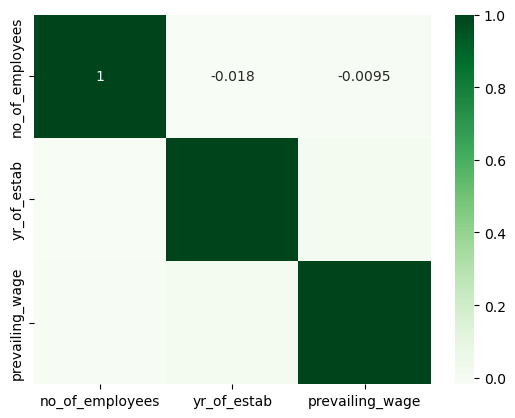

In [24]:
corr_data=Visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Greens')
plt.show()

- By seeing the grphs we might not say the relation status 

- it is best practice got the percentage of relation using correlation 

- All 3 columns having approximately Zero percentage of relation

- Which indicates all the columns having no relation 

- No relation means independent each other 

- In Ml we expect the input columns should be independent each other 

- corr method gives 3*3 total 9 field

- we have 3 columns 3*3 total 9 fields

- if a data has 20 columns then 20*20 total 400 fields

- thats why always go with heat map visulaization